# ISD - Travail pratique 05 – Régression linéaire
## Objectifs:
- Appliquer l’algorithme de régression linéaire simple pour créer des modèles de régression
- Utiliser la méthode de validation hold-out pour évaluer un modèle de régression
- Utiliser les bibliothèques d’apprentissage automatique pour construire des modèles de régression multiple
- Évaluer les modèles et analyser les résultats

In [227]:
# Import de toutes les librairies nécéssaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as ptchs
import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import math
import random
%matplotlib inline

## 1. Régréssion Linéaire simple

#### 1.2 Créez un notebook pour lire la base de données "Boston Housing Dataset" et générez un dataframe.

In [228]:
boston_dataset = load_boston()
# Création d'un dataframe en fournissant les données comme premier paramètre et le nom des colonnes comme deuxième.
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# Ajout de la variable dépendente en fin de dataframe
boston_df['MEDV'] = boston_dataset.target
boston_df.head()

d:\PROGRAMS\Miniconda\envs\isd_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 1.3 Se familiariser avec la base de données (p.ex., nombre d’observations, desclasses, d’attributs, statistiques des attributs, données manquantes).

Nous sommes allés chercher des informations sur le dataset sur internet et avons trouvé cette description des attributs : <br>

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

[Source](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)<br>

In [229]:
# Listage des différents attributs et les 5 premières lignes
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [230]:
# Nombre d'occurences de chaque attributs, afin de vérifier si les données sont complètes.
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [231]:
# Simple vérification de valeurs manquantes
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [232]:
# Moyenne, Médianne, Maximum et Minimum de chaque attribut.
# Cela sert à vérifier si des données aberrantes sont présentes.
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### Remarques

- Aucune valeur aberrante remarquable ne fut trouvée en regardant les moyennes et les quartiles.
- Aucune valeur ne manque aux attributs.
- Les valeurs furent bien importées dans **boston_df**

#### Générez un histogramme de la distribution de la variable dépendante.

In [233]:
# Normalisation des données.
boston_df = (boston_df-boston_df.min())/(boston_df.max()-boston_df.min())
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


Text(0, 0.5, 'Médianne de la valeur des maisons en milliers de dollars')

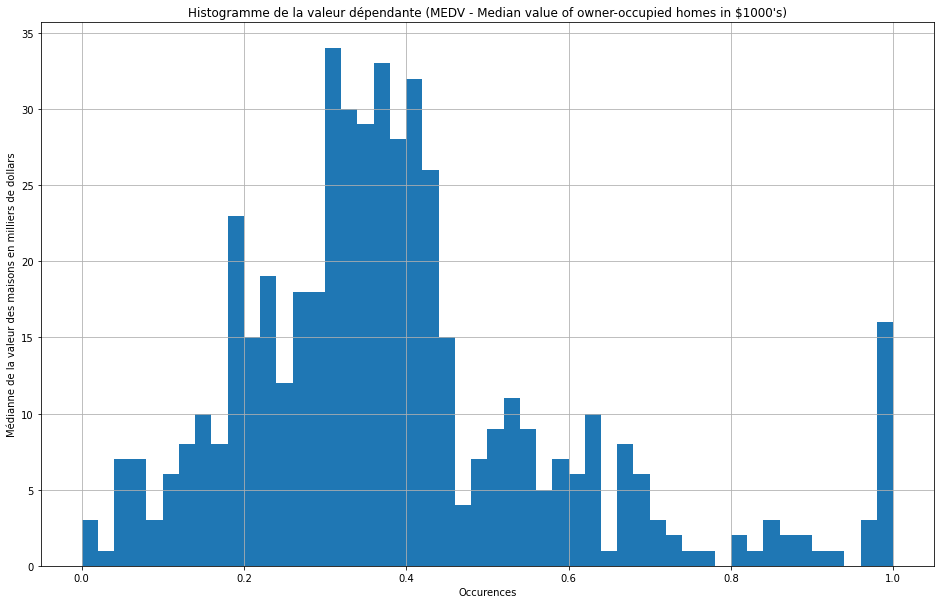

In [234]:
boston_df.hist('MEDV',bins=50,figsize=(16,10))
plt.title("Histogramme de la valeur dépendante (MEDV - Median value of owner-occupied homes in $1000's)")
plt.xlabel("Occurences")
plt.ylabel("Médianne de la valeur des maisons en milliers de dollars")

#### 1.4 Visualiser des boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE.

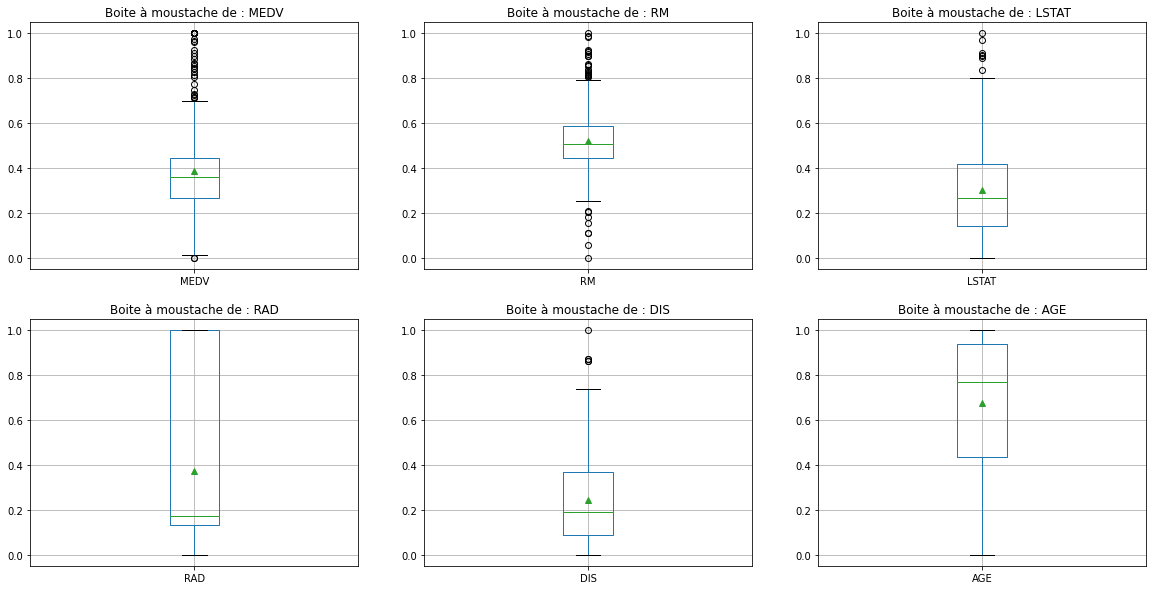

In [235]:
# Création des boites à moustaches
fig, axes = plt.subplots(2,3,figsize=(20,10))
axes=axes.flatten()

bp_attributs = ['MEDV','RM','LSTAT','RAD','DIS','AGE']

for i, ax, a in zip(range(len(axes)),axes,bp_attributs):
    # Plot
    boston_df.boxplot(a,ax=axes[i],showmeans=True)
    axes[i].set_title('Boite à moustache de : ' + a)


##### Scatter-plots (pour avoir un autre point de vue)

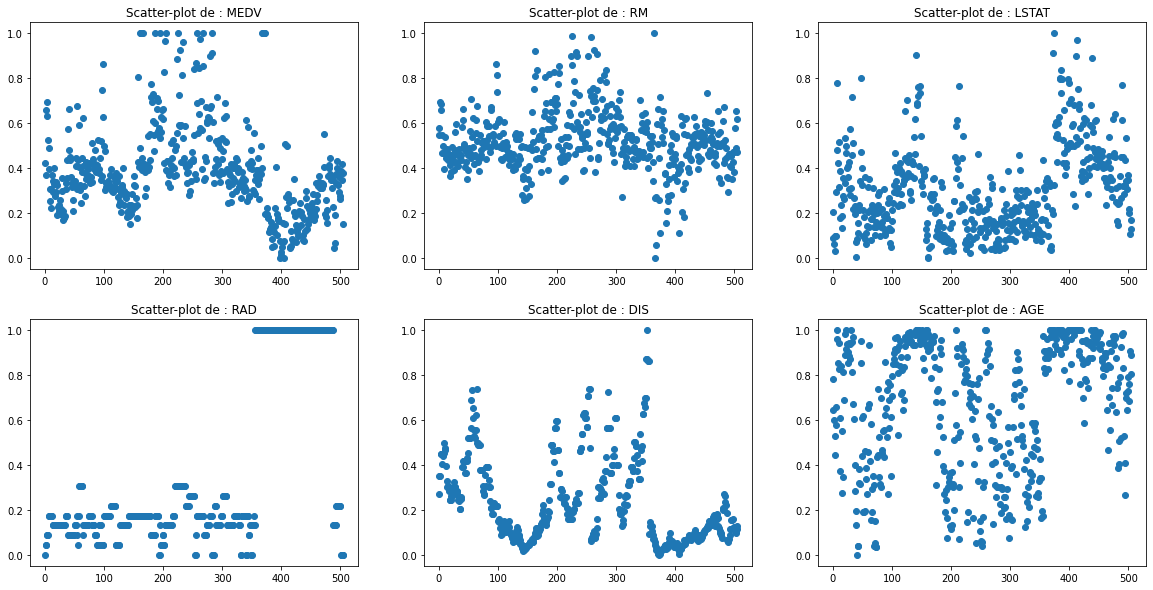

In [236]:
# Création des boites à moustaches
fig, axes = plt.subplots(2,3,figsize=(20,10))
axes=axes.flatten()

sp_attributs = ['MEDV','RM','LSTAT','RAD','DIS','AGE']

for i, ax, a in zip(range(len(axes)),axes,bp_attributs):
    # Plot
    boston_df[a].plot(y=a,ax=axes[i],marker='o',linestyle='none')
    axes[i].set_title('Scatter-plot de : ' + a)

##### Commentaires
Juste au-dessus nous avons généré 6 box-plots pour les différentes variables demandées. Cela nous permets de voir que certains boxplot possèdent des valeurs considérées aberrantes (MEDV, RM, LSTAT, DIS)
et les deux autres restants n'en possèdent pas. On remarque aussi une distribution spécial sur le boxplot de RAD. La boite est extrêmement étendue et la médianne et pourtant très basse, ce qui démontre une concentration de données autour de la valeur 5.

### 1.5 Créez des modèles en utilisant l’algorithme de régression linéaire simple vue en cours pour estimer la valeur MEDV à partir des variables RM, RAD et LSTAT, chaque fois utilisant seulement une des variables.
#### Programmez les fonctions pour faire une validation hold-out (e.g., 80% train + 20% test x 100 fois) et pour calculer le coefficient de détermination afin d’évaluer la performance moyenne du modèle.



In [237]:
# Set du seed pour avoir les mêmes résultats.
random.seed(0)

In [238]:
# Validation Hold-Out splittant en 80% de train et 20% de test.
def train_test_split(dataset, split=0.80):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        idx = random.randrange(len(dataset_copy))
        train.append(dataset_copy.pop(idx))
    return train, dataset_copy

In [239]:
def regression_reshape(attribute):
    return np.array(boston_df[attribute]).reshape(-1,1)

In [240]:
# Descente du gradient pas-à-pas
# Fonctions du PPT du cours
def compute_MSE(b,m,data):
    totalError = 0 # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError/ float(len(data)) # on divise par N

def step_gradient(b_current, m_current, data, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b,new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b, m = step_gradient(b, m, np.array(data), learning_rate)
        #print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
    return [b, m]

#### Première utilisation de l'algorithme de regréssion linéaire vu en cours.

In [241]:
# Utilisation de l'algorithme
# Hyperparamètres
learning_rate = 0.03
num_epochs = 1250

# On initialise la valeur de m et de b
initial_b = np.random.rand(1) # intercept
initial_m = np.random.rand(1) # pente

# On applique la méthode du gradient descendant
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_MSE(initial_b, initial_m, np.array(boston_df[['RM','MEDV']]))))
print("Running ...")
[b, m] = gradient_descent(np.array(boston_df[['RM','MEDV']]), initial_b, initial_m, learning_rate, num_epochs)
print("After {0} epochs : b = {1}, m = {2}, error = {3}".format(num_epochs, b, m, compute_MSE(b, m, np.array(boston_df[['RM','MEDV']]))))



Starting gradient descent at b = [0.45229934], m = [0.19500025], error = [0.0619719]
Running ...
After 1250 epochs : b = [0.12677256], m = [0.5114848], error = [0.02690396]


#### Première utilisation de l'algorithme de regréssion linéaire SKLEARN

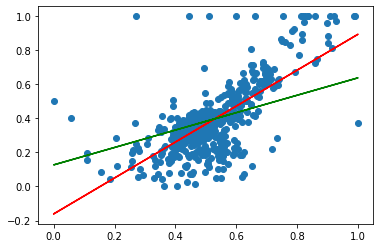

In [242]:
# Création d'un objet de type regréssion linéaire de SKLEARN
regression = LinearRegression()

# Fetch des données importantes pour notre regréssion
x_attribute = regression_reshape('RM')
y_attribute = regression_reshape('MEDV')

regression.fit(x_attribute,y_attribute)
prediction = regression.predict(x_attribute)

plt.scatter(x_attribute,y_attribute)
# Plot de notre prédiction créée avec la bibliothèque SKLEARN
plt.plot(x_attribute, prediction, 'red')
# PLot de notre prédiction créée avec l'algorithme vue en cours, en se basant sur les variable b et m.
plt.plot(x_attribute, m*x_attribute+b, 'green')
plt.show()

#### Observations
Sur ce graphique nous pouvons observer la variable RM et la variable MEDV en bleu sous forme d'un scatter plot. En rouge nous avons la fonction affine créée par la fonction de regréssion simple de SKLEARN, et en vert nous voyons celle créée par l'algorithme du cours. 
On remarque que la fonction rouge, colle mieux à la distribution des données que la fonction verte. Peut-être que les hyper-paramètres n'ont pas été assez bien choisis.

Lors des essais avec 500 epoch, la fonction verte était très différente de la rouge.
En essayant avec des epoch très grands (prenant 1 à 2 minutes à calculer), on se rapproche bien plus de la fonction verte.

#### Création de fonctions permettant de réaliser les deux regréssions pour les comparer

In [243]:
# Fonction réalisant une régression en utilisant SKLEARN
def sk_regression(attribute):
    # Création d'un objet de type regréssion linéaire de SKLEARN
    regression = LinearRegression()

    # Fetch des données importantes pour notre regréssion
    x_attribute = regression_reshape(attribute)
    y_attribute = regression_reshape('MEDV')

    regression.fit(x_attribute,y_attribute)
    prediction = regression.predict(x_attribute)
    return prediction

In [244]:
# Fonction réalisant une régression en utilisant l'algorithme vu en cours
# Par rapport à l'utilisation d'avant, celle-ci réalise une validation Hold-Out et rend 
def custom_regression(learning_rate, num_epochs, attribute):

    # Fetch des données qui nous intéressent
    data = boston_df[[attribute,'MEDV']]

    # Initiailisation des variable b et m
    initial_b = np.random.rand(1)
    initial_m = np.random.rand(1)

    # Afin d'utiliser la fonction gradient nous avons besoin d'array numpy.
    data = np.array(data)

    # Validation hold-out et conversion en tableaux numpy
    train, test = train_test_split(data)
    train = np.array(train)
    train.reshape(-1, 2)
    test = np.array(test)
    test.reshape(-1, 2)

    #print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_MSE(initial_b, initial_m, np.array(dfNorm[['RM','MEDV']]))))
    #print("Running ...")
    [b, m] = gradient_descent(np.array(boston_df[[attribute,'MEDV']]), initial_b, initial_m, learning_rate, num_epochs)
    #print("After {0} epochs : b = {1}, m = {2}, error = {3}".format(num_epochs, b, m, compute_MSE(b, m, np.array(dfNorm[['RM','MEDV']]))))
    return [b, m]
    

[0.56619853]
[-0.59219897]


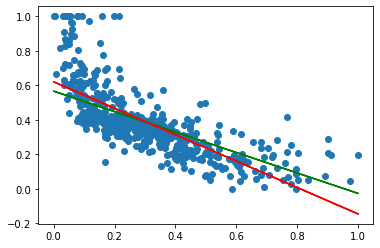

In [260]:
# Test de nos deux fonctions avec un autre attribut
attribute = 'LSTAT'
x_attribute = regression_reshape(attribute)
y_attribute = regression_reshape('MEDV')
sk_prediction = sk_regression(attribute)
[b, m] = custom_regression(0.03, 1250, attribute)
print(b)
print(m)
plt.scatter(x_attribute,y_attribute)
plt.plot(x_attribute, m*x_attribute+b, 'green')
plt.plot(x_attribute, sk_prediction, 'red')


Maintenant que nos deux fonctions de regréssion linéaire fonctionnent, une dernière fonction va être construire qui exécutera les deux regressions et rendra une comparaison des résultats sous forme de coefficients de determination. Elle affichera aussi le plot automatiquement.

In [278]:
def linear_regression_combo(learning_rate, num_epochs, attribute, splits):
    b_total = 0
    m_total = 0

    reshaped_attribute = regression_reshape(attribute)
    reshaped_MEDV = regression_reshape('MEDV')

    # On réalise la régrssion du cours n splits fois et on fait ensuite une moyenne des b et m.
    for i in range(splits):
        [b, m] = custom_regression(learning_rate, num_epochs, attribute)
        b_total += b
        m_total += m
    
    b_average = b_total / splits
    m_average = m_total / splits
    custom_prediction = m_average * reshaped_attribute  + b_average

    # On réalise la régrssion de sklearn
    sk_prediction = sk_regression(attribute)

    # Paramètres généraux du plot
    p = plt.figure()
    p.set_figheight(5)
    p.set_figwidth(15)
    plt.title("Regréssion linéaire sur variables {0} et MEDV".format(attribute))
    plt.xlabel(attribute)
    plt.ylabel('MEDV')
    sk_patch = ptchs.Patch(color='red', label='SKLEARN')
    custom_patch = ptchs.Patch(color='green', label='Custom')
    plt.legend(handles=[sk_patch, custom_patch])

    plt.scatter(reshaped_attribute, reshaped_MEDV, alpha=0.5)
    # Plot de la régression SKLEARN
    plt.plot(reshaped_attribute, sk_prediction, 'red')
    # Plot de la régression custom sur n splits
    plt.plot(reshaped_attribute, custom_prediction, 'green')

    plt.show()

    print('SCORE R2 (SKLEARN) : {:.6f}'.format(sklearn.metrics.r2_score(boston_df['MEDV'], sk_prediction)))
    print('SCORE R2 (CUSTOM)  : {:.6f}'.format(sklearn.metrics.r2_score(boston_df['MEDV'], custom_prediction)))


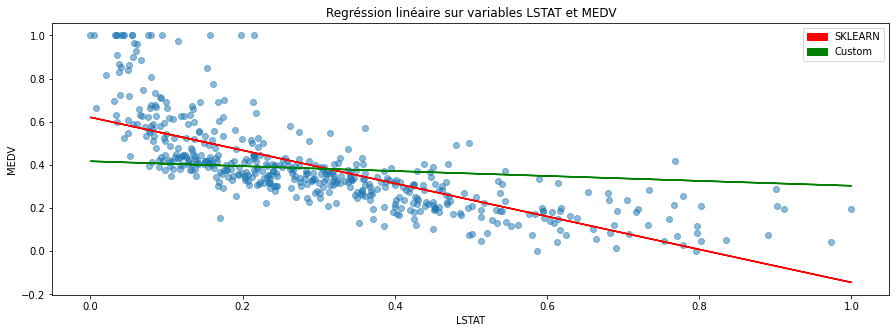

SCORE R2 (SKLEARN) : 0.544146
SCORE R2 (CUSTOM)  : 0.148310


In [279]:
# Test final de notre fonction de regréssion linéaire
# la donnée demande des splits à 100 mais cela prenant trop de temps le nombre de splits fut réduit à 5
learning_rate = 0.03
num_epochs = 500
splits = 5
attribute = 'LSTAT'

linear_regression_combo(learning_rate, num_epochs, attribute, splits)


#### Observations
Finalement, la fonction linear_regression_combo permets d'à peu près tout faire au niveau de la régression linéaire demandée dans la donnée du laboratoire. Elle créée un graphique permettant de comparer l'efficacité de SKLEARN contre notre algorithme custom, et affiche aussi les score du modèle calculés par SKLEARN. Finalement, nous pouvons simplement utiliser cette fonction dans des boucles afin de réaliser beaucoup de tests d'hyperparamètres à la suite.

### 1.6 Exploration des hyper-paramètres

Dans cette section, nous testerons différents hyper paramètres, plus praticulièrement différentes learning rates. Ceci sera effectué avec notre fonction linear_regression_combo.
Afin d'accélérer les calculs, le paramètre split est réglé sur 5.

In [297]:
def multiple_regressions(num_epochs, attribute, splits):
    for lr in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
        linear_regression_combo(lr, num_epochs, attribute, splits)
        print("LEARNING RATE : ",lr)
        print("EPOCHS : ",num_epochs)
        print("SPLITS : ",splits)
        print("\n")

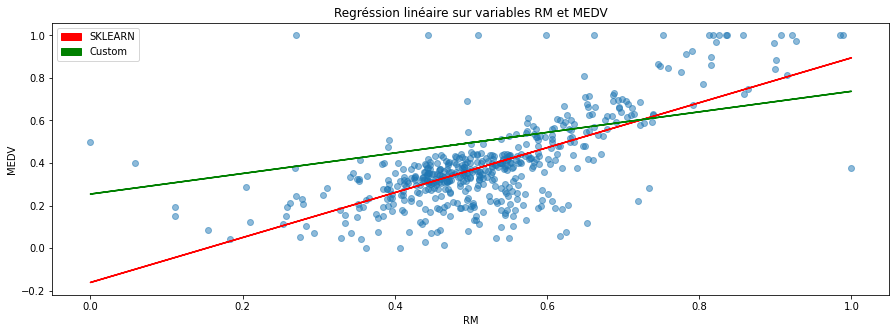

SCORE R2 (SKLEARN) : 0.483525
SCORE R2 (CUSTOM)  : 0.015175
LEARNING RATE :  0.001
EPOCHS :  1000
SPLITS :  5




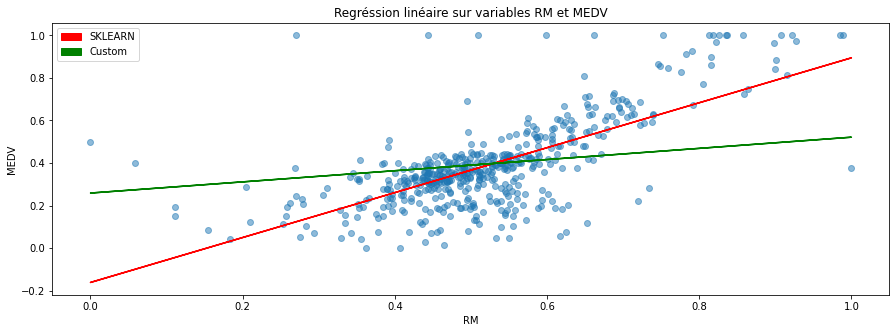

SCORE R2 (SKLEARN) : 0.483525
SCORE R2 (CUSTOM)  : 0.209621
LEARNING RATE :  0.005
EPOCHS :  1000
SPLITS :  5




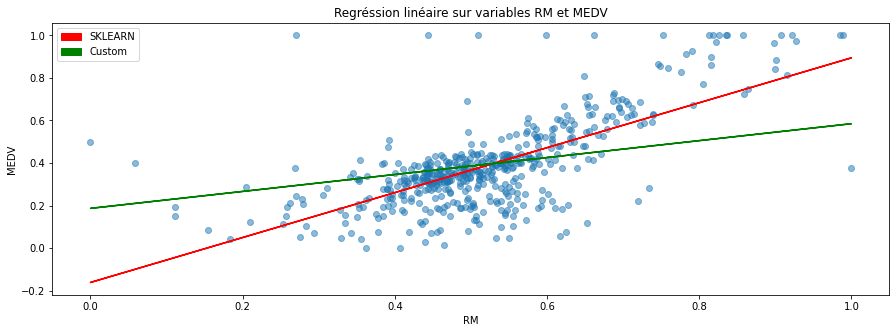

SCORE R2 (SKLEARN) : 0.483525
SCORE R2 (CUSTOM)  : 0.295208
LEARNING RATE :  0.01
EPOCHS :  1000
SPLITS :  5




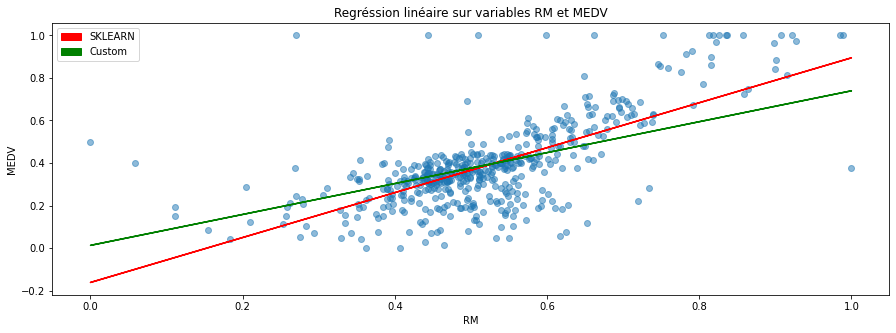

SCORE R2 (SKLEARN) : 0.483525
SCORE R2 (CUSTOM)  : 0.436338
LEARNING RATE :  0.05
EPOCHS :  1000
SPLITS :  5




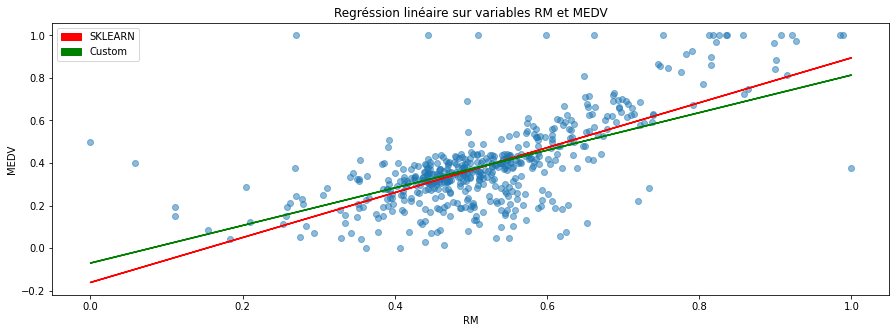

SCORE R2 (SKLEARN) : 0.483525
SCORE R2 (CUSTOM)  : 0.470628
LEARNING RATE :  0.1
EPOCHS :  1000
SPLITS :  5




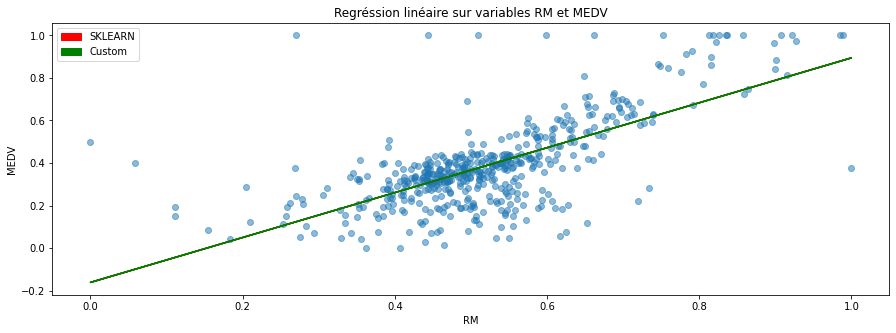

SCORE R2 (SKLEARN) : 0.483525
SCORE R2 (CUSTOM)  : 0.483525
LEARNING RATE :  0.5
EPOCHS :  1000
SPLITS :  5




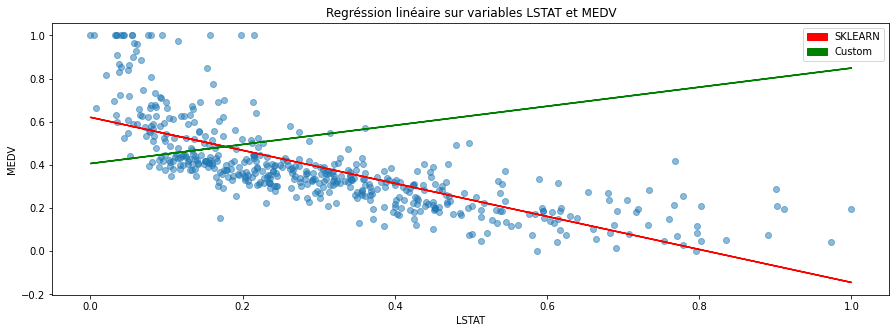

SCORE R2 (SKLEARN) : 0.544146
SCORE R2 (CUSTOM)  : -1.349592
LEARNING RATE :  0.001
EPOCHS :  1000
SPLITS :  5




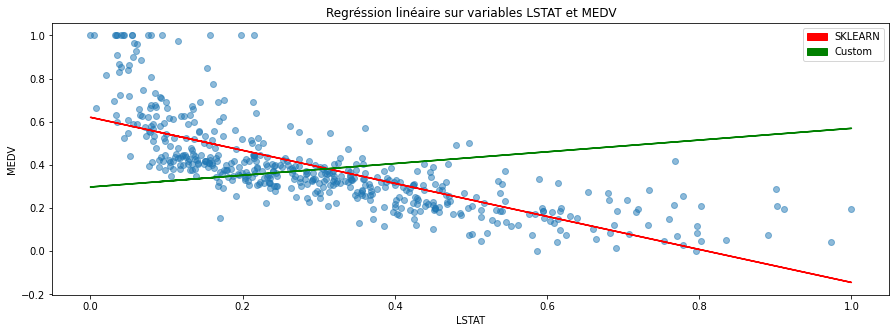

SCORE R2 (SKLEARN) : 0.544146
SCORE R2 (CUSTOM)  : -0.457555
LEARNING RATE :  0.005
EPOCHS :  1000
SPLITS :  5




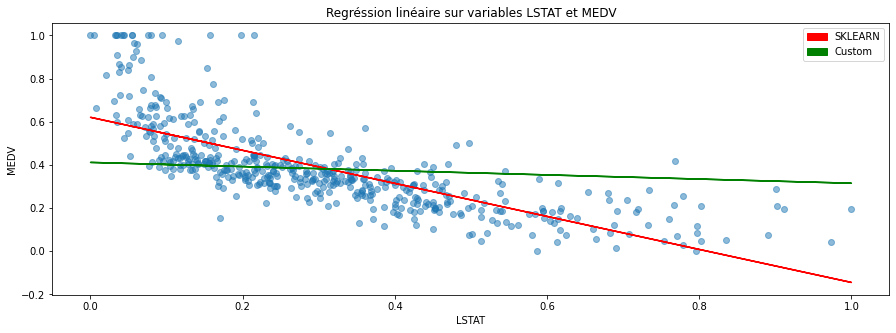

SCORE R2 (SKLEARN) : 0.544146
SCORE R2 (CUSTOM)  : 0.127285
LEARNING RATE :  0.01
EPOCHS :  1000
SPLITS :  5




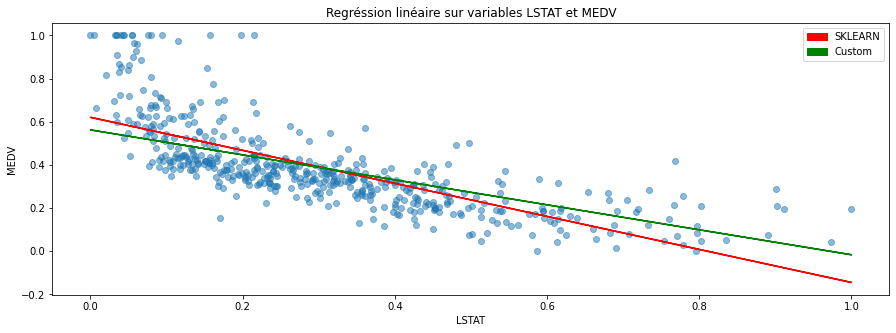

SCORE R2 (SKLEARN) : 0.544146
SCORE R2 (CUSTOM)  : 0.511673
LEARNING RATE :  0.05
EPOCHS :  1000
SPLITS :  5




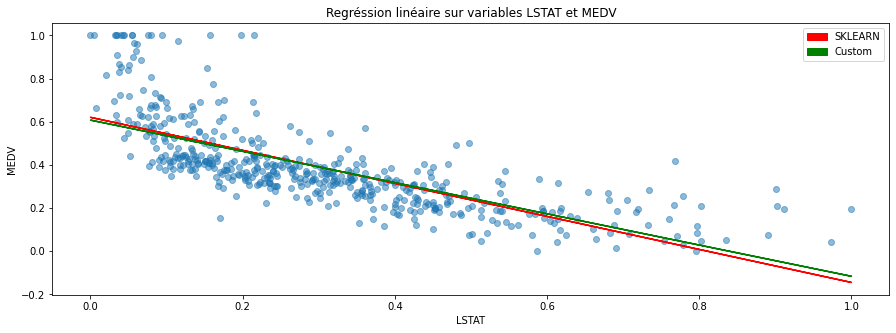

SCORE R2 (SKLEARN) : 0.544146
SCORE R2 (CUSTOM)  : 0.542540
LEARNING RATE :  0.1
EPOCHS :  1000
SPLITS :  5




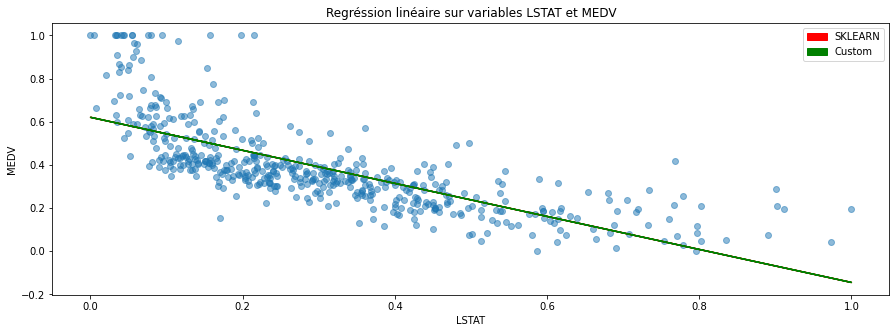

SCORE R2 (SKLEARN) : 0.544146
SCORE R2 (CUSTOM)  : 0.544146
LEARNING RATE :  0.5
EPOCHS :  1000
SPLITS :  5




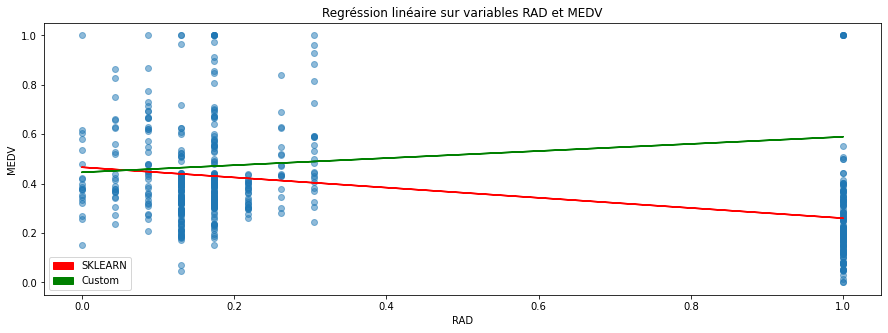

SCORE R2 (SKLEARN) : 0.145639
SCORE R2 (CUSTOM)  : -0.561433
LEARNING RATE :  0.001
EPOCHS :  1000
SPLITS :  5




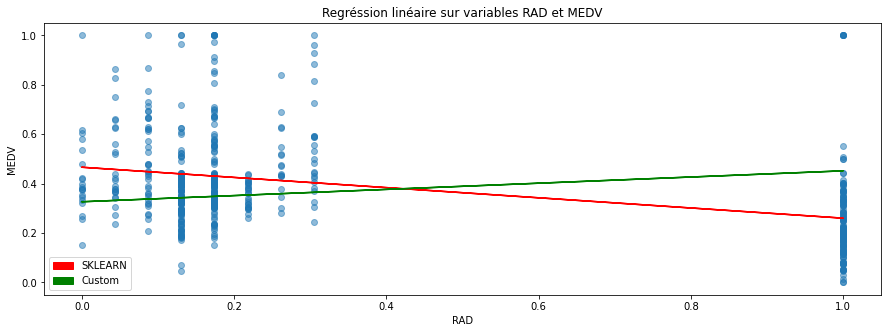

SCORE R2 (SKLEARN) : 0.145639
SCORE R2 (CUSTOM)  : -0.237104
LEARNING RATE :  0.005
EPOCHS :  1000
SPLITS :  5




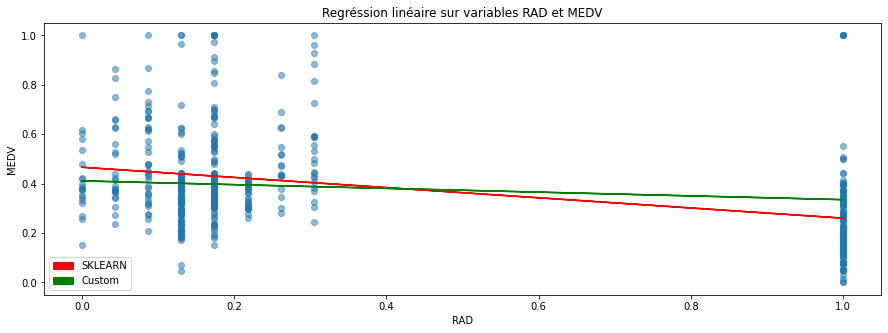

SCORE R2 (SKLEARN) : 0.145639
SCORE R2 (CUSTOM)  : 0.086465
LEARNING RATE :  0.01
EPOCHS :  1000
SPLITS :  5




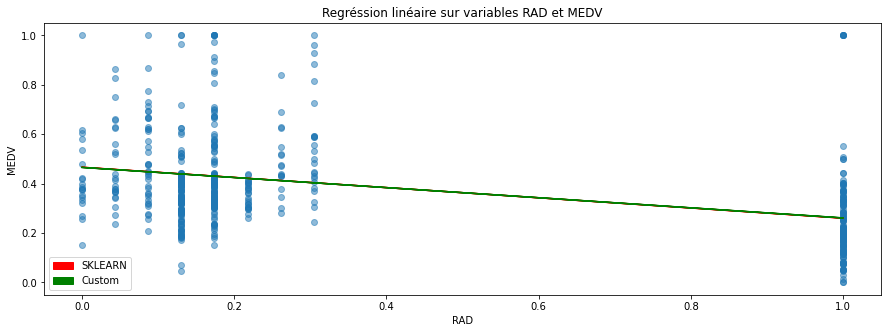

SCORE R2 (SKLEARN) : 0.145639
SCORE R2 (CUSTOM)  : 0.145630
LEARNING RATE :  0.05
EPOCHS :  1000
SPLITS :  5




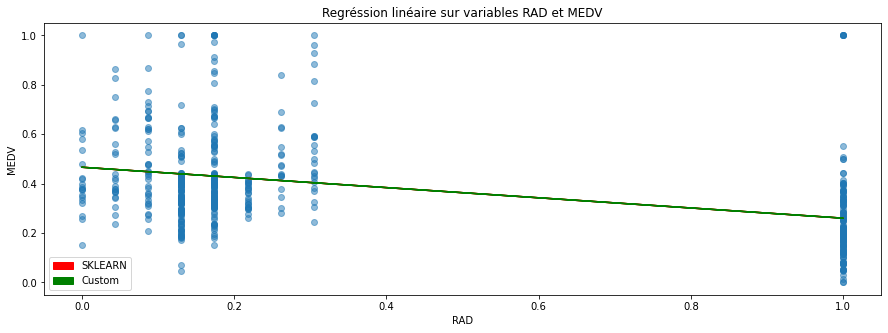

SCORE R2 (SKLEARN) : 0.145639
SCORE R2 (CUSTOM)  : 0.145639
LEARNING RATE :  0.1
EPOCHS :  1000
SPLITS :  5




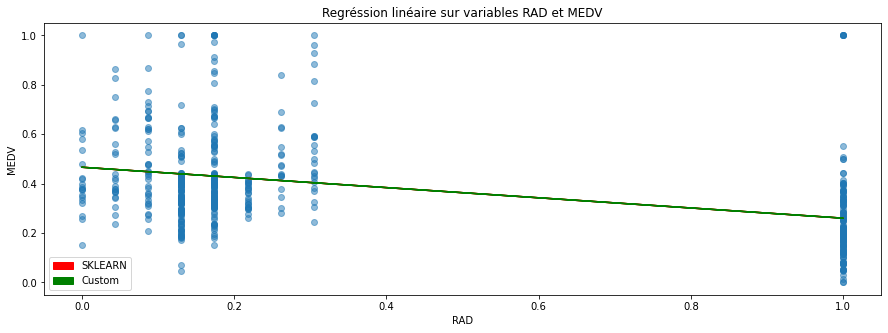

SCORE R2 (SKLEARN) : 0.145639
SCORE R2 (CUSTOM)  : 0.145639
LEARNING RATE :  0.5
EPOCHS :  1000
SPLITS :  5




In [298]:
num_epochs = 1000
splits = 5
attributes_to_test = ['RM','LSTAT','RAD']
for a in attributes_to_test:
    multiple_regressions(num_epochs, a, splits)

#### Observations
Après cette longue page de résultats, nous avons une conclusion assez claire. La fonction verte, qui correspond à notre algorithme de régression, est complètement à l'ouest lorsque que les valeurs de learning rate sont très petite, comme 0.0001 ou 0.005. Cependant, lors des calculs avec les valeurs 0.1 et 0.5, notre algorithme couvre presque parfaitement la fonction rouge (sklearn), le plus souvent lorsque la learning rate était à 0.5. Ce code fut testé avec plusieurs valeurs EPOCH et 1000 paraît être une bonne valeur de test. Elle est peut-être un peu trop grande mais elle me semble plus sûr et plus précise qu'avec des valeurs comme 500 ou 600.

#### Modèle Choisi
- EPOCHS : **1000**
- SPLITS : **5**
- LEARNING RATE : **0.5**

# 2. Régression Linéaire Multiple

### 2.1 Utilisez la bibliothèque sklearn pour entraîner un modèle de régression linéaire multiple qui exploite plusieurs variables indépendantes (p.ex. RM et LSTAT) de la base de données « Boston Housing dataset ».

In [306]:
# Nous allons utiliser une nouvelle fonction permettant de faire une regréssion linéaire multiple
# avec SKLEARN où nous allons utiliser plusieurs variables indépendante au lieu d'une seule.

def sk_multiple_regression(attributes):
    # Fetch des données qui nous intéréssent
    x_attributes = np.array(boston_df[attributes])
    y_attribute = np.array(boston_df['MEDV'])

    # Régression multiple en utilisant SKLEARN
    regression = LinearRegression()
    regression.fit(x_attributes, y_attribute)
    prediction = regression.predict(x_attributes)
    print("Using :",attributes)
    print('SCORE R2 : {:.6f}'.format(sklearn.metrics.r2_score(boston_df['MEDV'], prediction)))
    print("\n")

In [308]:
# Différents sets de variables à tester
test_attributes = [
    ['RM'],
    ['RM','LSTAT'],
    ['RM','LSTAT','RAD'],
    ['RM','LSTAT','RAD','AGE'],
    ['RM','LSTAT','RAD','AGE','ZN'],
    ['RM','LSTAT','RAD','AGE','ZN','TAX']
]

# Test des sets
for ta in test_attributes:
    sk_multiple_regression(ta)

# Test d'une regression multiple linéaire avec toutes les variables.
sk_multiple_regression(boston_df.columns)

Using : ['RM']
SCORE R2 : 0.483525


Using : ['RM', 'LSTAT']
SCORE R2 : 0.638562


Using : ['RM', 'LSTAT', 'RAD']
SCORE R2 : 0.642786


Using : ['RM', 'LSTAT', 'RAD', 'AGE']
SCORE R2 : 0.644104


Using : ['RM', 'LSTAT', 'RAD', 'AGE', 'ZN']
SCORE R2 : 0.646465


Using : ['RM', 'LSTAT', 'RAD', 'AGE', 'ZN', 'TAX']
SCORE R2 : 0.656995


Using : Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
SCORE R2 : 1.000000




#### Obeservations
Plus on ajoute de données à notre modèle, plus le coefficient de determination de notre modèle augmente, jusqu'à arriver à 1 lorsqu'on lui donne toutes les données de la base de données, ce qui fait parfaitement sens.

### 2.2 Utilisez la bibliothèque sklearn pour préparer les données pour faire une validation hold-out ainsi que pour le calcul du coefficient de détermination (r2_score) des modèles

In [364]:
def sk_multiple_regression_holdout(attributes, tries, holdout_size):
    # Fetch des données qui nous intéréssent
    x_attributes = np.array(boston_df[attributes])
    y_attribute = np.array(boston_df['MEDV'])
    
    for t in tries:
        score_sum = 0
        score_average = 0
        score_max = 0
        model_i = 0
        for i in range(t):
            # Régression multiple en utilisant SKLEARN
            x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_attributes, y_attribute, test_size=holdout_size, random_state=i)
            
            # Obtention du score de la regression de SKLEARN
            regression = LinearRegression()
            regression.fit(x_attributes, y_attribute)
            score_actual = regression.score(x_test, y_test)

            # On ajoute le score à la somme pour faire la moyenne ensuite
            score_sum += score_actual

            # Triage pour trouver le score maximum.
            if score_actual > score_max:
                score_max = score_actual
                
                # On garde en mémoire le meilleur i des tries
                model_i = i

        # Calcul de la moyenne du score
        score_average = score_sum / t

        # Affichage du résultat
        print("FOR {} TRIES".format(t))
        print("HOLDOUT : ", holdout_size)
        print("ATTRIBUTES : ",attributes)
        print('SCORE R2 MAX : {:.6f}'.format(score_max))
        print('SCORE R2 AVERAGE : {:.6f}'.format(score_average))
        print("\n")

    return model_i

In [365]:
tries = [64, 128, 256, 512, 1024]
best_i = 0
for ta in test_attributes:
    best_i = sk_multiple_regression_holdout(ta, tries, 0.8)

for ta in test_attributes:
    sk_multiple_regression_holdout(ta, tries, 0.2)


FOR 64 TRIES
HOLDOUT :  0.8
ATTRIBUTES :  ['RM']
SCORE R2 MAX : 0.542444
SCORE R2 AVERAGE : 0.477222


FOR 128 TRIES
HOLDOUT :  0.8
ATTRIBUTES :  ['RM']
SCORE R2 MAX : 0.571291
SCORE R2 AVERAGE : 0.478851


FOR 256 TRIES
HOLDOUT :  0.8
ATTRIBUTES :  ['RM']
SCORE R2 MAX : 0.571291
SCORE R2 AVERAGE : 0.480987


FOR 512 TRIES
HOLDOUT :  0.8
ATTRIBUTES :  ['RM']
SCORE R2 MAX : 0.571291
SCORE R2 AVERAGE : 0.481286


FOR 1024 TRIES
HOLDOUT :  0.8
ATTRIBUTES :  ['RM']
SCORE R2 MAX : 0.574685
SCORE R2 AVERAGE : 0.481724


FOR 64 TRIES
HOLDOUT :  0.8
ATTRIBUTES :  ['RM', 'LSTAT']
SCORE R2 MAX : 0.680752
SCORE R2 AVERAGE : 0.634839


FOR 128 TRIES
HOLDOUT :  0.8
ATTRIBUTES :  ['RM', 'LSTAT']
SCORE R2 MAX : 0.680752
SCORE R2 AVERAGE : 0.636255


FOR 256 TRIES
HOLDOUT :  0.8
ATTRIBUTES :  ['RM', 'LSTAT']
SCORE R2 MAX : 0.681308
SCORE R2 AVERAGE : 0.637353


FOR 512 TRIES
HOLDOUT :  0.8
ATTRIBUTES :  ['RM', 'LSTAT']
SCORE R2 MAX : 0.681308
SCORE R2 AVERAGE : 0.637362


FOR 1024 TRIES
HOLDOUT :  0.8

### 2.3 Présentez les résultats de vos expériences (points 1 et 2) avec la base de données proposée et commentez ceux-ci.
Beaucoup de cas furent testé, avec un certain nombre d'essais différent pour la validation hold-out et des sets d'attributs différents. On voit que lorsque les essais et les données augmentent, le score R2 augmente aussi, avoisinant les 65% de moyenne de score. Ce score est bien meilleur que le meilleur score obtenu avec nos regressions à une variable. (Environ 54% pour la variable LSAT par exemple)

Une observation assez intéréssante est aussi le fait qu'avec 0.8 de paramètre hold-out, la moyenne est meilleure mais avec 0.2 nous avons de meilleures maximums, mais une moyenne moindre.

Nous pouvons donc conclure que la régression linéaire multiple est objectivement plus efficace que la régression simple.

#### 2.4 Générez un scatter-plot (valeur prédite, variable dépendante) et une ligne droite correspondant à l’équation valeur prédite = valeur dépendante (Note : la variable dépendante est MEDV)


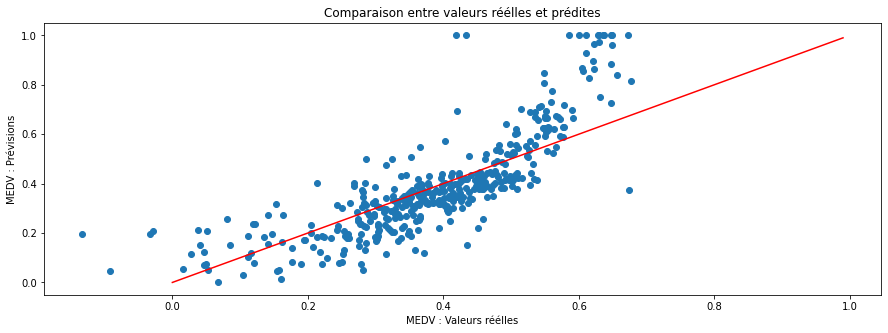

In [367]:
# On prend trois attributs
x_attributes = np.array(boston_df[['RM','LSTAT','RAD']])
y_attribute = np.array(boston_df['MEDV'])

# Entrainement en utilisant le best_i trouvé au-dessus
# D'après un autre groupe, c'est la meilleure manière de faire.
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_attributes,y_attribute, test_size=0.8, random_state=best_i)
x_medv = np.arange(0, y_attribute.max(), step=.01)

regression = LinearRegression()
regression.fit(x_train,y_train)
prediction = regression.predict(x_test)
p = plt.figure()
p.set_figheight(5)
p.set_figwidth(15)
plt.scatter(prediction, y_test)
plt.title("Comparaison entre valeurs réélles et prédites")
plt.xlabel('MEDV : Valeurs réélles')
plt.ylabel('MEDV : Prévisions')
plt.plot(x_medv, x_medv, 'red')
plt.show()


#### Obeservations
La ligne rouge représente ce qu'une distribution parfaite serait. Le scatter plot nous montre nos prévisions de la valeur MEDV en se basant sur RM, STAT et RAD.
Nos prédictions sont plutôt proches de la ligne rouge pour la plupart, mais certaines valeurs sont devenues aberrantes comme certaines en dessous de zéro. 

## Conclusion
Ce laboratoire nous a permis d'expérimenter avec diverses algorithmes et manière de mettre en place de la régression linéaire. Nous avons d'abord implémenter l'algorithme de regression linéaire vu en classe et avons effectués plusieurs tests afin de tester son fonctionnement. 

Une fois son bon fonctionnement assuré, nous avons créés diverses fonctions permettant de tester l'algorithme custom avec de la validation hold-out et de comparer sa performance à l'algorithme fourni par SKLEARN. 

Ensuite nous avons réalisés de nombreux tests dans lesquels les hyperparamètres changeaient. En analysant les résultats de ces tests-ci nous avons pu choisir un modèle qui nous paraissait le plus performant. 

Suivant cela, nous avons pataugé dans le domaine de la régression linéaire multiple afin de comparer l'efficacité de celle-ci contre la régression linéaire simple. Les résultats ont prouvé une efficacité supérieur pour la régression multiple.

Finalement, en utilisant tous les résultats obetenus durant le laboratoire nous avons mis en place une dernière prédiction de la variable MEDV, et nous l'avons comparée aux vrais variables sur un dernier plot pour constater l'efficacité de notre modèle. Ce dernier n'est pas parfait mais démontre tout de même une certaine efficacité.